# Data Handling in PyTorch Geometric - Part 1
> Inspired by Antonio Longa
- toc: True
- categories: [Pytorch Geometric] 

In [46]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import torch_geometric.loader as loader
import networkx as nx
from torch_geometric.utils.convert import to_networkx

## Data Manipulation 

In [2]:
# creating a dummy graph

node_features = torch.rand((100, 16), dtype=torch.float)

In [24]:
print(node_features.shape)

torch.Size([100, 16])


In [3]:
rows = np.random.choice(100, 500)
cols = np.random.choice(100, 500)
edges = torch.tensor([rows, cols])

In [22]:
print(rows.shape)
print(cols.shape)
print(edges.shape)

(500,)
(500,)
torch.Size([2, 500])


In [4]:
edges_attr = np.random.choice(3, 500) # one of three values 0, 1, 2

In [5]:
ys = torch.rand((100)).round().long() # target class for each node

Creating the graph information in PyG Data Object

In [6]:
graph = data.Data(x = node_features, edge_index=edges, edge_attr=edges_attr, y=ys)

In [7]:
graph

Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])

In [8]:
type(graph)

torch_geometric.data.data.Data

In [9]:
for prop in graph:
    print(prop)

('x', tensor([[0.3260, 0.5614, 0.7219,  ..., 0.8333, 0.2684, 0.6991],
        [0.2552, 0.7965, 0.5601,  ..., 0.2872, 0.7215, 0.5561],
        [0.4680, 0.9911, 0.2609,  ..., 0.7926, 0.7183, 0.5728],
        ...,
        [0.8130, 0.6181, 0.0477,  ..., 0.4111, 0.1915, 0.2908],
        [0.5820, 0.0549, 0.5638,  ..., 0.9298, 0.0790, 0.3821],
        [0.8570, 0.0329, 0.2215,  ..., 0.7657, 0.5044, 0.0548]]))
('edge_index', tensor([[22, 46, 57, 33, 51, 36, 73, 53, 98, 44, 19,  1, 43, 18, 75, 40, 28, 29,
         81, 16, 81, 77, 19, 28, 26, 56, 14, 65, 56, 23, 29, 32, 87, 62,  8, 82,
         17, 67, 27, 56, 39,  4, 34, 77, 45, 96, 28, 46, 32, 12, 15, 32,  8, 59,
         93, 49, 24, 50, 62, 95, 17, 16, 95, 61, 77,  2, 75, 32, 33, 19, 96, 49,
         33, 74, 61, 65, 13,  8,  0, 71, 29, 78, 24, 10, 35, 66, 49,  6, 38, 93,
          6, 54, 99, 41, 29, 59, 18, 62, 24, 48, 87, 77, 58, 60, 62, 37, 36, 31,
          7, 39, 12, 43, 26, 50, 37, 53, 98, 99, 58, 12,  7, 89, 78, 26, 81, 25,
         13, 

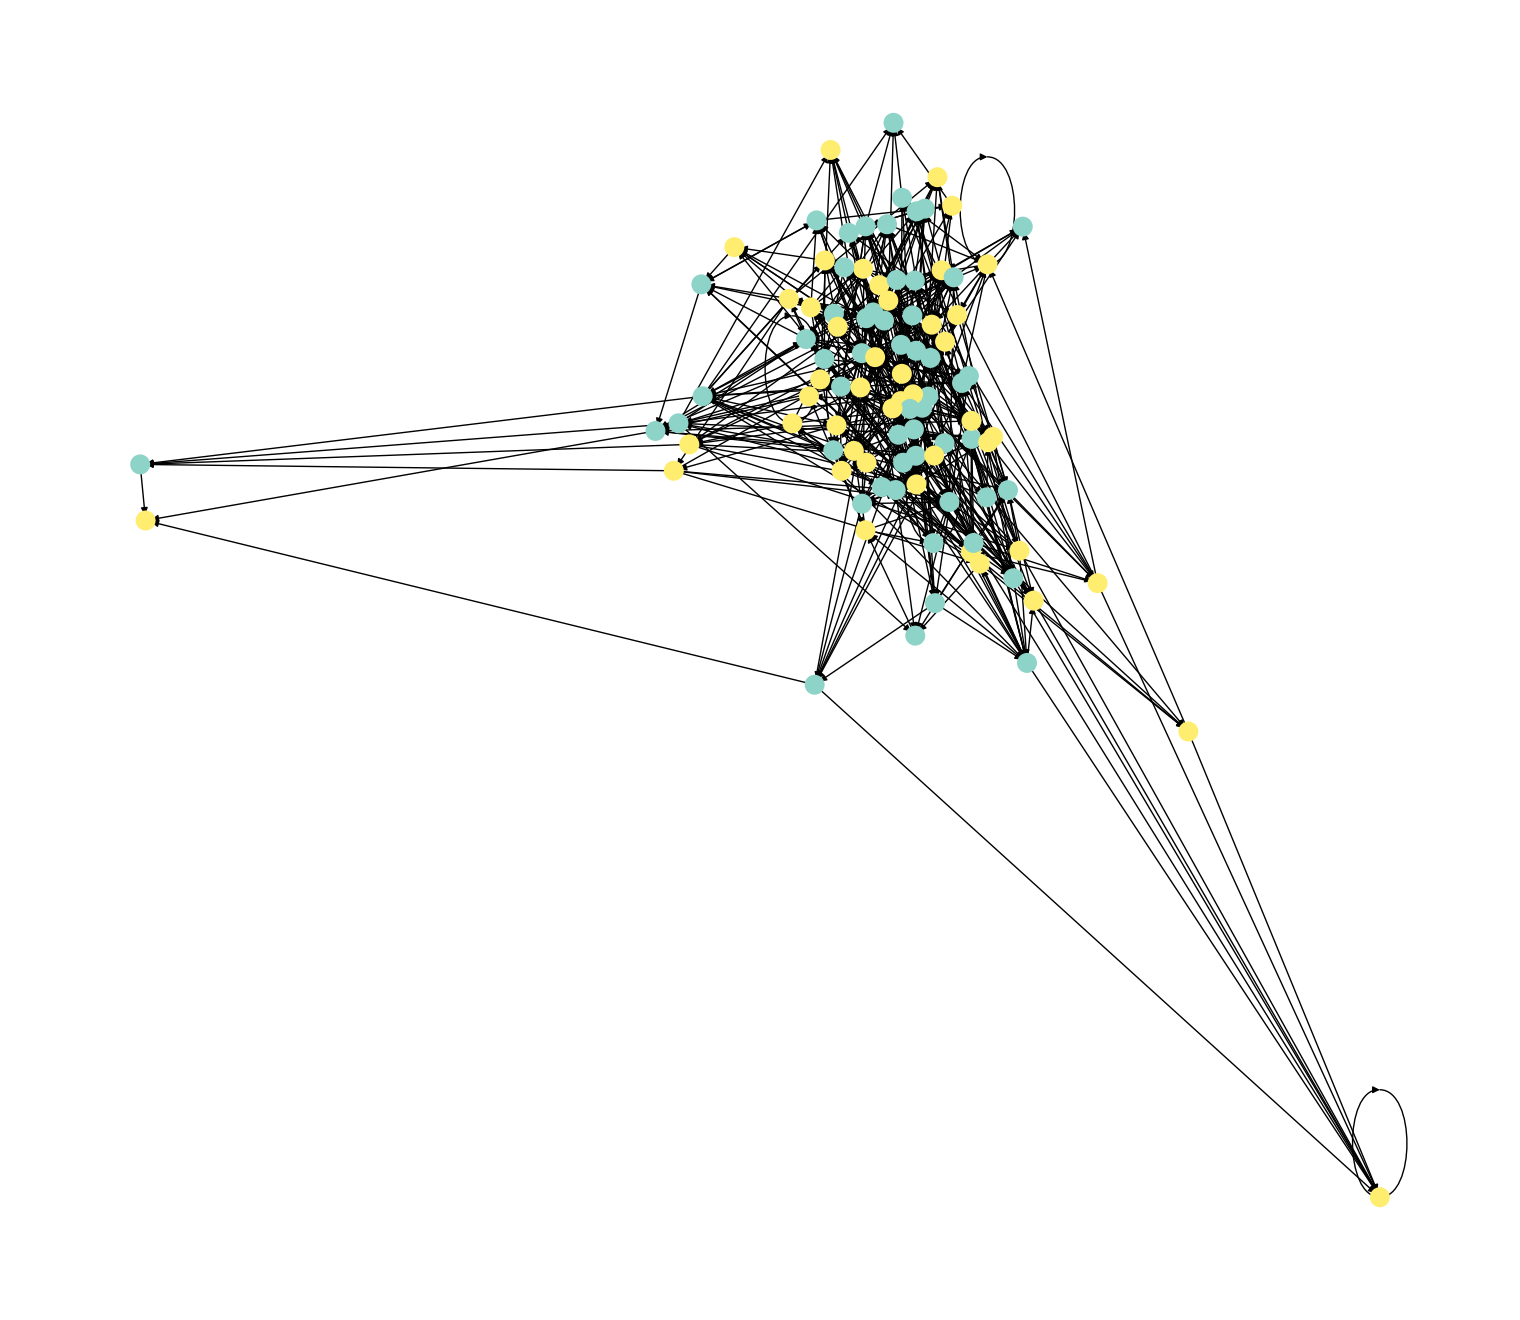

In [10]:
vis = to_networkx(graph)

node_labels = graph.y.numpy()

import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 13))
nx.draw(vis, cmap=plt.get_cmap('Set3'), node_color= node_labels, node_size=70, linewidths=6)
plt.show()

### Batch

with the Batch we can represent graphs as single disconnected graph

In [11]:
graph2 = graph

In [12]:
batch = data.Batch().from_data_list([graph, graph2])

In [13]:
print("Number of graphs:", batch.num_graphs)
print("Graph at index 1:", batch[1])
print("Retrieve the list of graphs:\n", len(batch.to_data_list()))

Number of graphs: 2
Graph at index 1: Data(x=[100, 16], edge_index=[2, 500], edge_attr=[500], y=[100])
Retrieve the list of graphs:
 2


### Cluster

In [14]:
# cluster = data.ClusterData(graph, 5) it is crashing on run

In [15]:
# clusterloader = data.ClusterLoader(cluster)

### Sampler

for each convolitonal layer, sample a maximum of nodes from each neighbourhood (as in GraphSAGE)

In [18]:
sampler = data.NeighborSampler(graph.edge_index, sizes=[3,10], batch_size=4, shuffle=False) #sizes is the nodes ion the levels

/home/siddy/anaconda3/envs/torch/lib/python3.8/site-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.NeighborSampler' is deprecated, use 'loader.NeighborSampler' instead
  warnings.warn(out)


In [19]:
for s in sampler:
    print(s)
    break # first batch of neighbors

(4, tensor([ 0,  1,  2,  3, 68,  5, 44, 57, 14, 84, 27, 23, 30, 24, 39, 76, 95, 75,
        67, 61, 34, 92, 51, 40, 87, 81, 12, 26, 98, 18,  7, 19, 36, 43, 96, 86,
        37, 42, 59, 78, 47, 58, 33,  8, 62, 82,  9, 71, 64, 25, 28, 77]), [EdgeIndex(edge_index=tensor([[ 4,  5,  6, 15,  7,  8,  9, 10, 11, 16, 17,  3, 12, 13, 14, 18, 19, 20,
          0, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,  4, 24, 34, 35,
         36, 36, 37, 38, 39, 40, 41, 13, 30, 42, 43, 36, 38, 44,  9, 45, 46, 47,
         27, 42, 48, 49,  6, 15, 22, 50, 14, 27, 33, 34, 35, 43, 51],
        [ 0,  0,  0,  0,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
          4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10, 11, 11, 11, 11,
         12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14]]), e_id=tensor([148, 453, 350, 230, 131, 438, 227, 263,  29,  59,  14, 409, 450,  56,
        217,  37,  74, 197, 2

In [26]:
print("Batch Size:", s[0])
print("Number of unique nodes involved in the sampling:", len(s[1]))
print("Number of neighbors sampled:", len(s[2][0].edge_index[0]), len(s[2][1].edge_index[0]))

Batch Size: 4
Number of unique nodes involved in the sampling: 52
Number of neighbors sampled: 69 11


## Datasets

In [27]:
datasets.__all__

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'FakeDataset',
 'FakeHeteroDataset',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI',
 'Reddit',
 'Reddit2',
 'Flickr',
 'Yelp',
 'AmazonProducts',
 'QM7b',
 'QM9',
 'MD17',
 'ZINC',
 'MoleculeNet',
 'Entities',
 'RelLinkPredDataset',
 'GEDDataset',
 'AttributedGraphDataset',
 'MNISTSuperpixels',
 'FAUST',
 'DynamicFAUST',
 'ShapeNet',
 'ModelNet',
 'CoMA',
 'SHREC2016',
 'TOSCA',
 'PCPNetDataset',
 'S3DIS',
 'GeometricShapes',
 'BitcoinOTC',
 'ICEWS18',
 'GDELT',
 'DBP15K',
 'WILLOWObjectClass',
 'PascalVOCKeypoints',
 'PascalPF',
 'SNAPDataset',
 'SuiteSparseMatrixCollection',
 'TrackMLParticleTrackingDataset',
 'AMiner',
 'WordNet18',
 'WordNet18RR',
 'WikiCS',
 'WebKB',
 'WikipediaNetwork',
 'Actor',
 'OGB_MAG',
 'DBLP',
 'MovieLens',
 'IMDB',
 'LastFM',
 'HGBDataset',
 'JODIEDataset',
 'MixHopSyntheticDataset',
 'UPFD',
 'GitHub',
 'FacebookPagePage',
 'LastFMAsia',
 'DeezerEurope',
 'GemsecD

In [31]:
name = 'Cora'
transform = transforms.Compose([
    transforms.RandomNodeSplit('train_rest', num_val=500, num_test=500),
    transforms.TargetIndegree()
])
cora = datasets.Planetoid('./data', name, pre_transform=transforms.NormalizeFeatures(), transform=transform)
# pre_transform applied only when the dataset is downloading
# once dataeset is downloaded the transforms will be applies 
# if dataset is already downloaded the running cell again will retrive dataset from the local it self

Processing...
Done!


In [32]:
aids = datasets.TUDataset(root='./data', name="AIDS")

Extracting data/AIDS/AIDS.zip
Processing...
Done!


### Cora and AIDS Datasets

In [33]:
print("AIDS info:")
print("# of graphs:", len(aids))
print("# Classes {graphs}", aids.num_classes)
print("# Edge features", aids.num_edge_features)
print("# Edge labels", aids.num_edge_labels)
print("# Node features", aids.num_node_features)

AIDS info:
# of graphs: 2000
# Classes {graphs} 2
# Edge features 3
# Edge labels 3
# Node features 38


In [35]:
print("Cora info:")
print("# of graphs:", len(cora))
print("# Classes {graphs}", cora.num_classes)
print("# Edge features", cora.num_edge_features)
print("# Node features", cora.num_node_features)

Cora info:
# of graphs: 1
# Classes {graphs} 7
# Edge features 1
# Node features 1433


cora does not have attribute num_edge_labels

In [36]:
aids.data
# implies one single data object

Data(x=[31385, 38], edge_index=[2, 64780], edge_attr=[64780, 3], y=[2000])

In [38]:
aids[0]
#info of a specific graph

Data(edge_index=[2, 106], x=[47, 38], edge_attr=[106, 3], y=[1])

In [37]:
cora.data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [39]:
cora[0]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_attr=[10556, 1])

In [47]:
cora_loader = loader.DataLoader(cora)

In [48]:
for l in cora_loader:
    print(l)
    break

DataBatch(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_attr=[10556, 1], batch=[2708], ptr=[2])
